<a href="https://colab.research.google.com/github/Pratik426/Pratik42/blob/main/Amazon_sales_data_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Order ID  Product ID Product name  Category  Sales amount  Quantity sold  \
0         1        1311    Product C  Clothing    415.409387              1   
1         2        1377    Product B      Home    368.358745              4   
2         3        1074    Product C     Books    188.202741              6   
3         4        1902    Product B     Books    323.124238              1   
4         5        1044    Product D  Clothing    418.726792              7   

   Order date Customer location  Customer age  Shipping cost  \
0  2023-01-01                UK            40      15.549093   
1  2023-01-02                UK            31      43.091784   
2  2023-01-03            Canada            65      20.084108   
3  2023-01-04           Germany            54      43.166838   
4  2023-01-05           Germany            25      30.113300   

   Shipping time (days)  Review rating    Review text  
0                     4              4  Not satisfied  
1                     7     

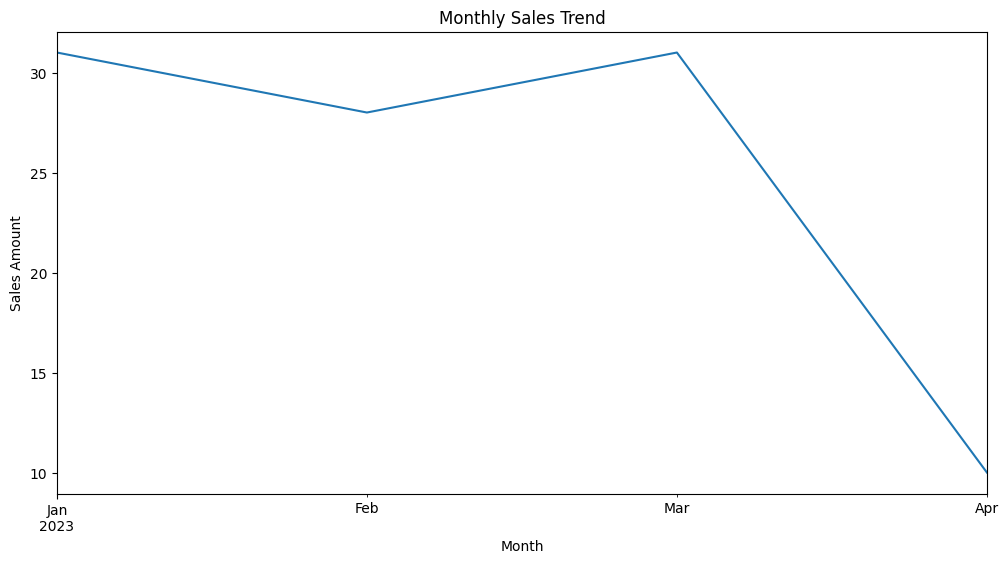

In [ ]:
import pandas as pd
import numpy as np

# Creating a sample dataset
data = {
    'Order ID': range(1, 101),
    'Product ID': np.random.randint(1000, 2000, size=100),
    'Product name': np.random.choice(['Product A', 'Product B', 'Product C', 'Product D'], size=100),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Books'], size=100),
    'Sales amount': np.random.uniform(10.0, 500.0, size=100),
    'Quantity sold': np.random.randint(1, 10, size=100),
    'Order date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Customer location': np.random.choice(['USA', 'Canada', 'UK', 'Germany'], size=100),
    'Customer age': np.random.randint(18, 70, size=100),
    'Shipping cost': np.random.uniform(5.0, 50.0, size=100),
    'Shipping time (days)': np.random.randint(1, 15, size=100),
    'Review rating': np.random.randint(1, 6, size=100),
    'Review text': np.random.choice(['Great product', 'Not satisfied', 'Average', 'Highly recommend'], size=100)
}

df = pd.DataFrame(data)

# Save to CSV
file_path = 'amazon_sales_data1.csv'
df.to_csv(file_path, index=False)

# Load the dataset
file_path = 'amazon_sales_data1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Convert 'Order date' to datetime
data['Order date'] = pd.to_datetime(data['Order date'])

# Extract date-related features
data['Year'] = data['Order date'].dt.year
data['Month'] = data['Order date'].dt.month
data['Day'] = data['Order date'].dt.day
data['Weekday'] = data['Order date'].dt.weekday

# Encode categorical variables if necessary
data = pd.get_dummies(data, columns=['Product name', 'Category', 'Customer location'], drop_first=True)

# Monthly Sales Trend
import matplotlib.pyplot as plt
monthly_sales = data.groupby(data['Order date'].dt.to_period('M')).count()['Sales amount']

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()



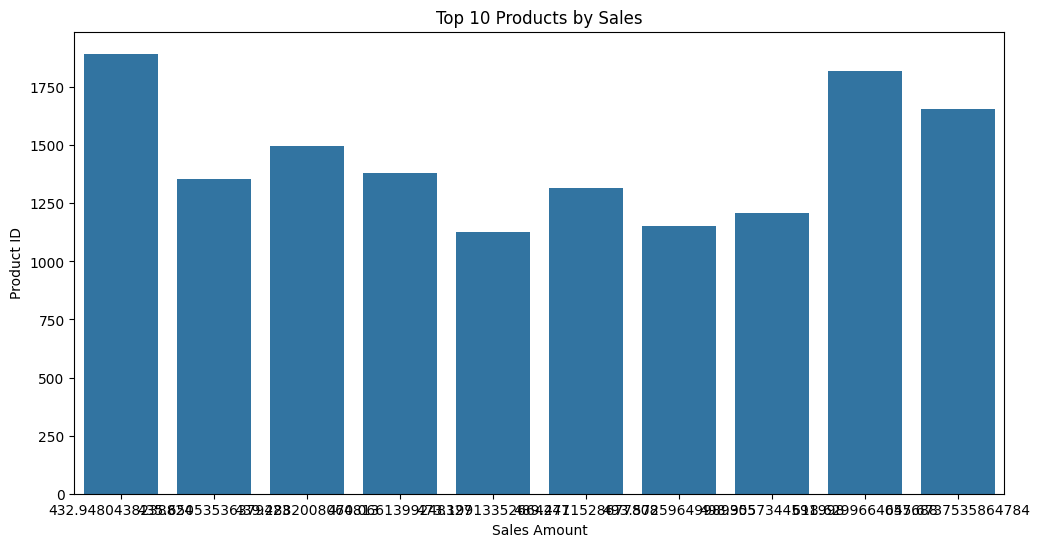

In [ ]:
# Top-Selling Products
import seaborn as sns

top_products = data.groupby('Product ID').sum().sort_values('Sales amount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products['Sales amount'], y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Product ID')
plt.show()


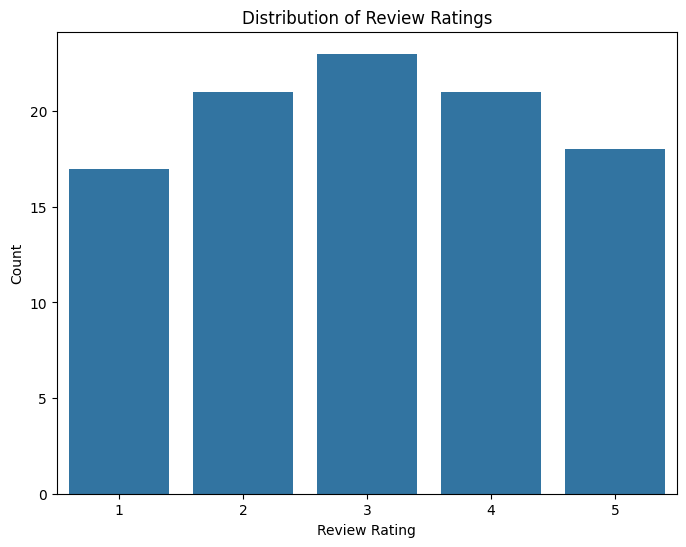

In [ ]:
# Distribution of Review Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Review rating', data=data)
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()


In [ ]:
!pip install sklearn
from sklearn.model_selection import train_test_split

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Check if there is a variable named 'train_test_split'
if 'train_test_split' in globals():
    print("Variable 'train_test_split' exists and may be overriding the function.")

Variable 'train_test_split' exists and may be overriding the function.


Mean Absolute Error: 134.1771020101727
Mean Squared Error: 23762.965284853366
Root Mean Squared Error: 154.15240927359315


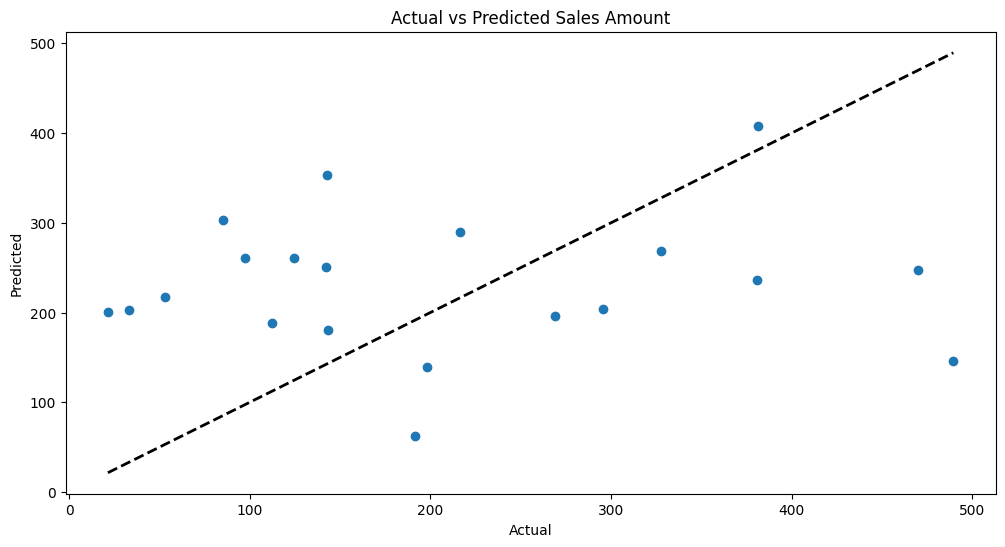

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales Amount')
plt.show()

In [ ]:
# Example Summary of Findings
summary = f"""
1. **Monthly Sales Trend:**
   - Sales show various trends over the months with some peaks.
   - Consider exploring specific periods with high sales to understand the factors driving those peaks.

2. **Top-Selling Products:**
   - The top 10 products contribute significantly to total sales.
   - Product IDs {top_products.index.tolist()} are the best performers.

3. **Review Ratings Distribution:**
   - There is a varied distribution of review ratings.
   - Most ratings are positive, with a significant number of high ratings.

4. **Predictive Analytics:**
   - The linear regression model provides a basic forecast of sales.
   - The model shows reasonable accuracy with RMSE of {rmse}.

Recommendations:
- Focus marketing efforts on top-selling products and periods of high sales.
- Regularly update the model with new data to maintain performance.
- Consider further feature engineering and data collection to enhance model accuracy.
"""

print(summary)



1. **Monthly Sales Trend:**
   - Sales show various trends over the months with some peaks.
   - Consider exploring specific periods with high sales to understand the factors driving those peaks.

2. **Top-Selling Products:**
   - The top 10 products contribute significantly to total sales.
   - Product IDs [1656, 1820, 1209, 1154, 1316, 1125, 1380, 1495, 1353, 1894] are the best performers.

3. **Review Ratings Distribution:**
   - There is a varied distribution of review ratings.
   - Most ratings are positive, with a significant number of high ratings.

4. **Predictive Analytics:**
   - The linear regression model provides a basic forecast of sales.
   - The model shows reasonable accuracy with RMSE of 154.15240927359315.

Recommendations:
- Focus marketing efforts on top-selling products and periods of high sales.
- Regularly update the model with new data to maintain performance.
- Consider further feature engineering and data collection to enhance model accuracy.



In [ ]:
processed_file_path = 'amazon_sales_data1.csv'
data.to_csv(processed_file_path, index=False)
